# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('books_1.csv')

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

<AxesSubplot:>

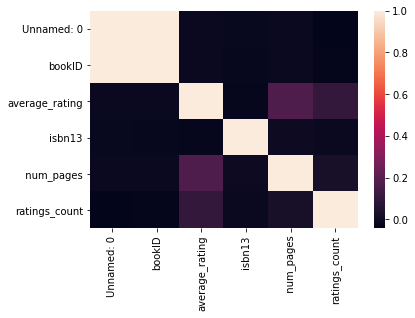

In [3]:
sns.heatmap(df.corr())

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [6]:
# assign x and y variables
X = df['average_rating']
y = df['  num_pages']


# create train and test sets
# divide the training and testing sets into a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [7]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# fit the regression line using ordinary least square method
lr = sm.OLS(y_train, X_train_sm).fit()

# parameters
lr.params

const            -237.361231
average_rating    151.452902
dtype: float64

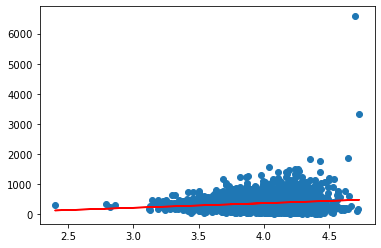

In [8]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, -237.36 + 151.45*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


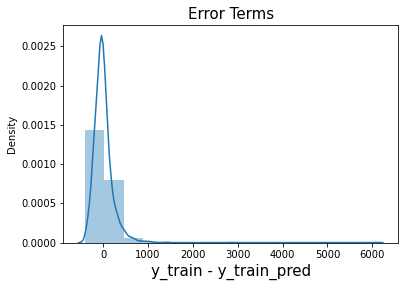

In [9]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [10]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_pages   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     98.53
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           6.30e-23
Time:                        05:27:12   Log-Likelihood:                -24677.
No. Observations:                3599   AIC:                         4.936e+04
Df Residuals:                    3597   BIC:                         4.937e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -237.3612     60.702     -3.910      0.000    -356.375    -118.347
average_rating   151.4529     15.258      9.926      0.000     121.538     181.368
==============================================================================
Omnibus:                     4716.664   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3236464.259
Skew:                           6.746   Prob(JB):                         0.00
Kurtosis:                     149.289   Cond. No.                         67.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.027
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not effective in this case.
3. Was your plot of the error terms a bell curve? No